In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
#df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [6]:
# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

In [7]:
from sklearn.model_selection import train_test_split
all_attacks = df['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks:
    # Get data for the current category
    category_data = df[df['attack'] == category]
    # Split into train and test, ensuring each category appears in test
    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train_data = pd.concat([train_data,category_train])
    test_data = pd.concat([test_data,category_test])

In [8]:
X_train = train_data.drop(['attack','is_attack','attack_category'],axis=1)
y_train = train_data['is_attack']
X_test = test_data.drop(['attack','is_attack','attack_category'],axis=1)
y_test = test_data['is_attack']

In [9]:
test_data['attack'].nunique()

23

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag','land','wrongfragment','urgent','loggedin','rootshell','suattempted','numshells',
                       'ishostlogin','isguestlogin']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [11]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [12]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
#rf = RandomForestClassifier(class_weight='balanced', max_depth=20,
#                       min_samples_split=10, n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

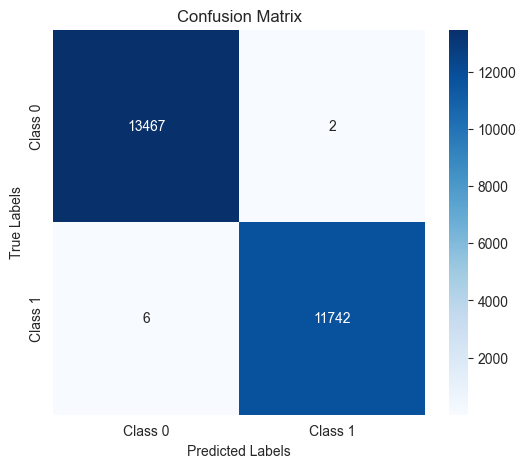

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
y_pred_df = pd.DataFrame(y_pred,index=y_test.index)
y_pred_df.isna().sum()

0    0
dtype: int64

In [15]:
combined_pred = pd.concat([y_test,y_pred_df],axis=1)
combined_pred.columns = ['is_attack','is_attack_pred']
predicted_probabilities = rf.predict_proba(X_test)
combined_pred['predict_prob'] = predicted_probabilities[:, 1]

In [16]:
combined_pred.shape

(25217, 3)

In [17]:
combined_pred[combined_pred['is_attack'] != combined_pred['is_attack_pred']]

,is_attack,is_attack_pred,predict_prob
89853,0,1,0.61
108732,0,1,0.58
81558,1,0,0.46
35434,1,0,0.27
69942,1,0,0.46
40845,1,0,0.47
62554,1,0,0.47
113266,1,0,0.48


In [18]:
combined_pred_eq = combined_pred[combined_pred['is_attack'] == combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred[combined_pred['is_attack'] != combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred_uneq[combined_pred_uneq['is_attack'] == 1]
combined_pred = pd.concat([combined_pred_eq,combined_pred_uneq],axis=0)
combined_pred.shape

(25215, 3)

In [19]:
combined_pred.shape

(25215, 3)

In [20]:
op = pd.merge(X_test,combined_pred,left_index=True,right_index=True)
op = pd.merge(op,df[['attack_category','attack']],left_index=True,right_index=True)
op.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,predict_prob,attack_category,attack
18091,-0.109305,2.223235,-1.176125,0.751241,-0.007738,-0.005283,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,0.182986,2.168302,-0.637513,-0.632046,-0.374379,-0.374551,0.770809,-0.349259,-0.336107,0.736012,1.258270,1.066453,-0.438899,-0.479495,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,-0.657064,-0.54098,-0.25174,-0.242122,-0.503688,1.161676,-0.196049,-0.625478,-0.343032,-0.173354,-0.4188,1.304677,-0.292246,0,0,0.0,normal,normal
29741,-0.109305,-0.124695,-0.442350,0.751241,-0.007699,-0.002286,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,1.233741,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.585898,-0.148033,-0.637513,-0.632046,-0.374379,-0.374551,0.770809,-0.349259,-0.374609,0.736012,1.258270,1.066453,-0.438899,-0.479495,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,0.654599,-0.54098,-0.25174,-0.242122,-0.503688,-0.099830,-0.196049,-0.625478,-0.343032,-0.173354,-0.4188,1.304677,-0.292246,0,0,0.0,normal,normal
76709,-0.109305,2.223235,-1.176125,0.751241,-0.007741,-0.005291,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.725695,-0.368637,-0.637513,-0.632046,-0.374379,-0.374551,0.770809,-0.349259,-0.374609,-1.379091,0.734382,1.066453,-0.438899,2.765990,-0.199825,-0.639305,-0.624803,-0.387852,-0.376434,0.654599,-0.54098,-0.25174,-0.242122,-0.503688,-0.329195,-0.196049,-0.625478,-0.343032,-0.173354,-0.4188,0.800650,-0.292246,0,0,0.0,normal,normal
91928,-0.109305,2.223235,1.086347,0.751241,-0.007729,-0.005278,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.673271,-0.368637,-0.637513,-0.632046,-0.374379,-0.374551,-1.185454,1.260520,-0.374609,0.736012,1.204075,1.021894,-0.385956,-0.479495,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,-0.657064,-0.54098,-0.25174,-0.242122,-0.503688,-0.329482,-0.155957,-0.625478,-0.343032,-0.173354,-0.4188,1.209259,0.212259,0,0,0.0,normal,normal
39962,-0.098884,2.223235,-1.176125,0.751241,-0.007741,-0.005304,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.708221,-0.313486,-0.637513,-0.632046,-0.374379,-0.374551,-0.753256,3.369886,1.165466,-1.207868,-0.755989,-0.002954,-0.174186,-0.414585,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,0.654599,-0.54098,-0.25174,-0.242122,-0.503688,-0.329338,-0.156352,-0.625478,-0.343032,-0.173354,-0.4188,-0.766698,0.031934,0,0,0.0,normal,normal


In [21]:
attacks = op[op['is_attack_pred'] == 1].copy()
attacks['attack_category'].value_counts()

attack_category
dos         8997
scan        2333
access       206
backdoor     193
exploit       13
Name: count, dtype: int64

In [69]:
#attacks.to_csv('m2input.csv')

In [22]:
all_attacks1 = attacks['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train1_data = pd.DataFrame()
test1_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks1:
    # Get data for the current category
    category_data = attacks[attacks['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)
    elif len(category_data) == 1:
        test1_data = pd.concat([test1_data,category_data])
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train1_data = pd.concat([train1_data,category_train])
    test1_data = pd.concat([test1_data,category_test])

In [23]:
X1_train = train1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_train = train1_data['attack_category']
X1_test = test1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_test = test1_data['attack_category']

In [24]:
test1_data['attack'].nunique()

22

In [25]:
X1_train.drop(['is_attack_pred','predict_prob'],axis=1,inplace=True)
X1_test.drop(['is_attack_pred','predict_prob'],axis=1,inplace=True)

In [26]:
test1_data['attack'].nunique()

22

In [27]:
target_encoder = LabelEncoder()
y1_train_encoded = target_encoder.fit_transform(y1_train)
y1_test_encoded = target_encoder.transform(y1_test)

In [28]:
cat_labels = [target_encoder.classes_[i] for i in range(0,5)]

In [49]:
# from sklearn.ensemble  import RandomForestClassifier
# rf1 = RandomForestClassifier(class_weight='balanced',random_state=42)
# rf1.fit(X1_train, y1_train_encoded)
# y_pred1= rf1.predict(X1_test)

from xgboost import XGBClassifier
xgb1 = XGBClassifier(objective='multi:softmax',num_class=5,random_state=42)
xgb1.fit(X1_train,y1_train_encoded)

y_pred1 = xgb1.predict(X1_test)

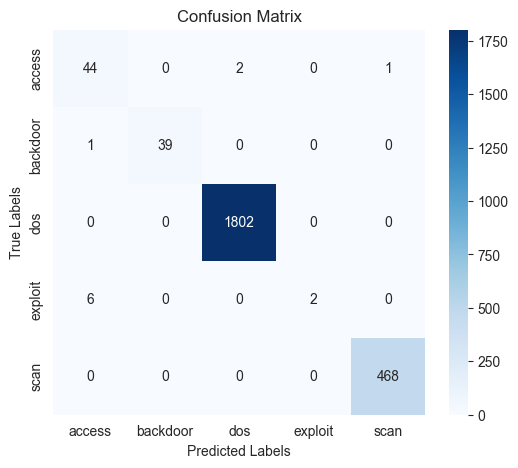

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y1_test_encoded, y_pred1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cat_labels, yticklabels=cat_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y1_test_encoded,y_pred1,target_names=cat_labels))

              precision    recall  f1-score   support

      access       0.86      0.94      0.90        47
    backdoor       1.00      0.97      0.99        40
         dos       1.00      1.00      1.00      1802
     exploit       1.00      0.25      0.40         8
        scan       1.00      1.00      1.00       468

    accuracy                           1.00      2365
   macro avg       0.97      0.83      0.86      2365
weighted avg       1.00      1.00      1.00      2365



In [32]:
# from sklearn.model_selection import GridSearchCV


# param_grid = {
#         "n_estimators": [50,100,150,200],
#         "max_depth" : [3, 4, 5, 7],
#         "learning_rate": [0.1,0.01,0.03,0.2],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         }

# xgb_model = xgb.XGBClassifier()
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X1_train, y1_train_encoded)

# all_params = grid_search.best_estimator_.get_params()
# tuned_params = {param: all_params[param] for param in param_grid}
# tuned_params

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'n_estimators': 200,
 'max_depth': 4,
 'learning_rate': 0.2,
 'subsample': 0.6,
 'colsample_bytree': 0.8}

In [67]:
xgb12 = XGBClassifier(objective='binary:logistic',n_estimators=200,
                          max_depth= 4,
                          learning_rate= 0.2,
                          subsample= 0.6,
                         colsample_bytree=0.8)
xgb12.fit(X1_train,y1_train_encoded)
y_pred12 = xgb12.predict(X1_test)

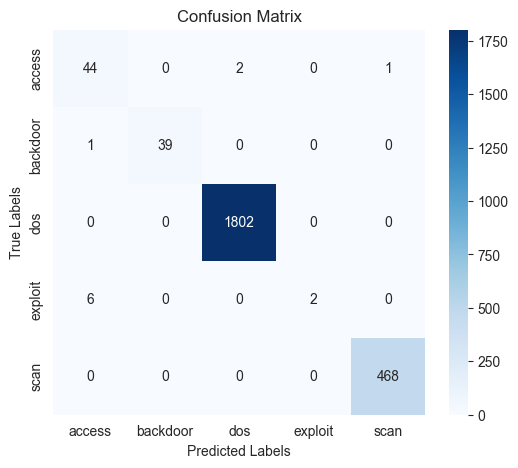

In [68]:
cm2 = confusion_matrix(y1_test_encoded, y_pred12)

plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=cat_labels, yticklabels=cat_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y1_test_encoded,y_pred12,target_names=cat_labels))

              precision    recall  f1-score   support

      access       0.86      0.94      0.90        47
    backdoor       1.00      0.97      0.99        40
         dos       1.00      1.00      1.00      1802
     exploit       1.00      0.25      0.40         8
        scan       1.00      1.00      1.00       468

    accuracy                           1.00      2365
   macro avg       0.97      0.83      0.86      2365
weighted avg       1.00      1.00      1.00      2365



In [36]:
y1_pred_df = pd.DataFrame(y_pred12,index=y1_test.index)
y1_pred_df.isna().sum()

0    0
dtype: int64

In [58]:
combined_pred1 = pd.concat([y1_test,y1_pred_df],axis=1)
combined_pred1.columns = ['attack_category','attack_category_pred']
predicted_probabilities1 = xgb12.predict_proba(X1_test)
combined_pred1['predict_prob'] = predicted_probabilities1[:, 1]

In [59]:
ocategory = dict()
for i in range(len(target_encoder.classes_)):
    ocategory[i] = target_encoder.classes_[i]
ocategory

{0: 'access', 1: 'backdoor', 2: 'dos', 3: 'exploit', 4: 'scan'}

In [60]:
combined_pred1['attack_category_pred'] = combined_pred1['attack_category_pred'].map(ocategory)

In [62]:
combined_pred1[combined_pred1['attack_category_pred'] != combined_pred1['attack_category']]

,attack_category,attack_category_pred,predict_prob
51170,access,scan,0.001301
11448,exploit,access,0.058827
30533,exploit,access,0.006368
6086,access,dos,0.013480
103765,access,dos,0.026733
102579,exploit,access,0.000327
64331,backdoor,access,0.000223
102579,exploit,access,0.000327
66007,exploit,access,0.000393
102579,exploit,access,0.000327


In [63]:
op1 = pd.merge(X1_test,combined_pred1,left_index=True,right_index=True)
op1 = pd.merge(op1,df['attack'],left_index=True,right_index=True)
op1.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category,attack_category_pred,predict_prob,attack
114818,-0.109305,-0.124695,1.086347,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.187777,-0.230760,1.601997,1.604962,-0.374379,-0.374551,-1.390179,-0.016201,-0.374609,0.736012,-1.026966,-1.139200,0.037585,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,0.654599,1.976079,-0.251740,-0.242122,1.314966,-0.185842,0.064652,1.655734,-0.343032,-0.173354,-0.219538,-0.911127,-0.255776,dos,dos,0.000002,neptune
11620,-0.109305,-0.124695,1.086347,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.231463,-0.106670,1.601997,1.604962,-0.374379,-0.374551,-1.299190,-0.016201,-0.374609,0.736012,-1.008900,-1.116920,-0.015358,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,0.654599,2.033285,-0.251740,-0.242122,2.802956,-0.053240,0.070577,1.655734,-0.343032,-0.173354,-0.020277,-0.910606,-0.227410,dos,dos,0.000002,neptune
59380,-0.109305,-0.124695,1.086347,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,0.095612,-0.175609,1.601997,1.604962,-0.374379,-0.374551,-1.139959,-0.016201,-0.374609,0.736012,-0.909542,-1.027803,-0.174186,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,0.654599,0.545932,-0.251740,-0.242122,1.976295,-0.125634,-0.083474,1.655734,-0.343032,-0.173354,1.075662,-0.903480,-0.140287,dos,dos,0.000001,neptune
125476,-0.109305,-0.124695,0.046833,-2.222715,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,0.418893,-0.106670,-0.637513,-0.632046,2.746164,2.713627,-1.162707,-0.016201,-0.374609,0.736012,-0.864380,-0.983244,-0.121243,-0.479495,-0.288563,-0.639305,-0.624803,2.873430,2.754351,-0.657064,-0.540980,1.826081,6.785952,-0.503688,-0.059691,-0.039628,-0.625478,3.321282,0.530084,-0.418800,-0.897397,-0.049111,dos,dos,0.000004,neptune
13585,-0.109305,-0.124695,2.309305,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.484845,-0.327274,1.601997,1.604962,-0.374379,-0.374551,-1.458421,0.039308,-0.374609,0.736012,-1.008900,-1.116920,-0.068301,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,-0.219843,2.365080,-0.251740,-0.242122,0.157641,-0.270707,0.155108,1.655734,-0.343032,-0.173354,-0.020277,-0.910606,-0.235515,dos,dos,0.000002,neptune


In [64]:
op1['attack_category'].value_counts()

attack_category
dos         1802
scan         468
access        49
backdoor      40
exploit       14
Name: count, dtype: int64

In [65]:
final = op1.drop(['attack_category','predict_prob'],axis=1)
final.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category_pred,attack
114818,-0.109305,-0.124695,1.086347,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.187777,-0.230760,1.601997,1.604962,-0.374379,-0.374551,-1.390179,-0.016201,-0.374609,0.736012,-1.026966,-1.139200,0.037585,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,0.654599,1.976079,-0.251740,-0.242122,1.314966,-0.185842,0.064652,1.655734,-0.343032,-0.173354,-0.219538,-0.911127,-0.255776,dos,neptune
11620,-0.109305,-0.124695,1.086347,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.231463,-0.106670,1.601997,1.604962,-0.374379,-0.374551,-1.299190,-0.016201,-0.374609,0.736012,-1.008900,-1.116920,-0.015358,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,0.654599,2.033285,-0.251740,-0.242122,2.802956,-0.053240,0.070577,1.655734,-0.343032,-0.173354,-0.020277,-0.910606,-0.227410,dos,neptune
59380,-0.109305,-0.124695,1.086347,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,0.095612,-0.175609,1.601997,1.604962,-0.374379,-0.374551,-1.139959,-0.016201,-0.374609,0.736012,-0.909542,-1.027803,-0.174186,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,0.654599,0.545932,-0.251740,-0.242122,1.976295,-0.125634,-0.083474,1.655734,-0.343032,-0.173354,1.075662,-0.903480,-0.140287,dos,neptune
125476,-0.109305,-0.124695,0.046833,-2.222715,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,0.418893,-0.106670,-0.637513,-0.632046,2.746164,2.713627,-1.162707,-0.016201,-0.374609,0.736012,-0.864380,-0.983244,-0.121243,-0.479495,-0.288563,-0.639305,-0.624803,2.873430,2.754351,-0.657064,-0.540980,1.826081,6.785952,-0.503688,-0.059691,-0.039628,-0.625478,3.321282,0.530084,-0.418800,-0.897397,-0.049111,dos,neptune
13585,-0.109305,-0.124695,2.309305,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.484845,-0.327274,1.601997,1.604962,-0.374379,-0.374551,-1.458421,0.039308,-0.374609,0.736012,-1.008900,-1.116920,-0.068301,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,-0.219843,2.365080,-0.251740,-0.242122,0.157641,-0.270707,0.155108,1.655734,-0.343032,-0.173354,-0.020277,-0.910606,-0.235515,dos,neptune


In [66]:
opcounts = op1.groupby(['attack_category','attack'])['count'].count().reset_index()
opcounts[opcounts['count'] == 1]

,attack_category,attack,count
0,access,ftp_write,1
4,access,phf,1
8,backdoor,spy,1
16,exploit,perl,1
17,exploit,rootkit,1


In [43]:
dos_data = final[final['attack_category_pred'] == 'dos'].copy()
dos_data.drop('attack_category_pred',axis=1,inplace=True)

scan_data = final[final['attack_category_pred'] == 'scan'].copy()
scan_data.drop('attack_category_pred',axis=1,inplace=True)

backdoor_data = final[final['attack_category_pred'] == 'backdoor'].copy()
backdoor_data.drop('attack_category_pred',axis=1,inplace=True)

access_data = final[final['attack_category_pred'] == 'access'].copy()
access_data.drop('attack_category_pred',axis=1,inplace=True)

exploit_data = final[final['attack_category_pred'] == 'exploit'].copy()
exploit_data.drop('attack_category_pred',axis=1,inplace=True)

In [44]:
access_train = access_data[access_data['attack'].isin(['ftp_write','multihop','phf'])]
access_data = access_data[~access_data.index.isin(access_train.index)]

exploit_train = exploit_data[exploit_data['attack'].isin(['rootkit'])]
exploit_data = exploit_data[~exploit_data.index.isin(exploit_train.index)]

In [ ]:
access_data['attack'].value_counts()

In [47]:
# dosx = dos_data.drop('attack',axis=1)
# dosy = dos_data['attack']
# dosxtrain,dosxtest,dosytrain,dosytest = train_test_split(dosx,dosy,test_size=0.2,stratify=dosy,random_state=42)


# scanx = scan_data.drop('attack',axis=1)
# scany = scan_data['attack']
# scanxtrain,scanxtest,scanytrain,scanytest = train_test_split(scanx,scany,test_size=0.2,stratify=scany,random_state=42)

# backx = backdoor_data.drop('attack',axis=1)
# backy = backdoor_data['attack']
# backxtrain,backxtest,backytrain,backytest = train_test_split(backx,backy,test_size=0.2,stratify=backy,random_state=42)


# accessx = access_data.drop('attack',axis=1)
# accessy = access_data['attack']
# accessxtrain,accessxtest,accessytrain,accessytest = train_test_split(accessx,accessy,test_size=0.2,stratify=accessy,random_state=42)

# exploitx = exploit_data.drop('attack',axis=1)
# exploity = exploit_data['attack']
# exploitxtrain,exploitxtest,exploitytrain,exploitytest = train_test_split(exploitx,exploity,test_size=0.2,stratify=exploity,random_state=42)

In [126]:
# dos_encoder = LabelEncoder()
# dosytrain = dos_encoder.fit_transform(dosytrain)
# dosytest = dos_encoder.transform(dosytest)

# scan_encoder = LabelEncoder()
# scanytrain = scan_encoder.fit_transform(scanytrain)
# scanytest = scan_encoder.transform(scanytest)

# access_encoder = LabelEncoder()
# accessytrain = access_encoder.fit_transform(accessytrain)
# accessytest = access_encoder.transform(accessytest)

# backdoor_encoder = LabelEncoder()
# backytrain = backdoor_encoder.fit_transform(backytrain)
# backytest = backdoor_encoder.transform(backytest)

# exploit_encoder = LabelEncoder()
# exploitytrain= exploit_encoder.fit_transform(exploitytrain)
# exploitytest = exploit_encoder.transform(exploitytest)